In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv("data/train.csv")

In [37]:
df = df.replace(r'^\s*$', np.nan, regex=True)
#Filling with mode for the other columns
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
df['OCCUPATION'].fillna('U1', inplace=True)
df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0], inplace=True)
df['LOYALTY_PROGRAM'].fillna('U2', inplace=True)
df.describe()

,ID,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,43.805660,2015.507960,11244.207287
std,43301.414527,14.828219,2.685645,8458.166886
min,1.000000,23.000000,2008.000000,208.000000
25%,37500.750000,30.000000,2013.000000,6034.750000
50%,75000.500000,43.000000,2017.000000,8926.000000
75%,112500.250000,54.000000,2018.000000,13636.000000
max,150000.000000,85.000000,2019.000000,103520.000000


In [38]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,U1,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,U1,High,2013,U2,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


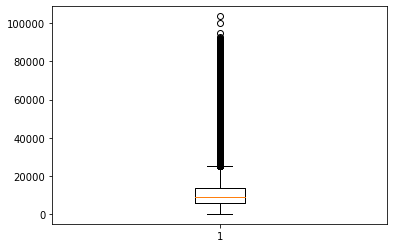

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(df["PAST_PURCHASE"])
plt.show()

<AxesSubplot:xlabel='PAST_PURCHASE'>

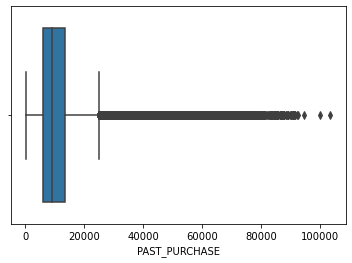

In [40]:
import seaborn as sns
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

In [41]:
Q1=df['PAST_PURCHASE'].quantile(0.25)
Q3=df['PAST_PURCHASE'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker, Upper_Whisker)

6034.75
13636.0
7601.25
-5367.125 25037.875


In [42]:
df = df[df['PAST_PURCHASE']< Upper_Whisker]

<AxesSubplot:xlabel='PAST_PURCHASE'>

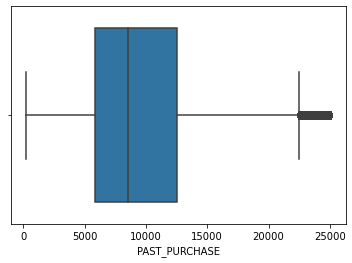

In [43]:
import seaborn as sns
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

In [44]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,U1,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,U1,High,2013,U2,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


<AxesSubplot:xlabel='AGE'>

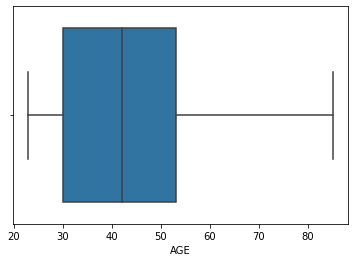

In [45]:
import seaborn as sns
sns.boxplot(data=df,x=df['AGE'])

In [46]:
#Dropping the ID column 
df = df.drop(['ID'], axis = 1)

In [47]:
df['LOYALTY_PROGRAM'] = df['LOYALTY_PROGRAM'].map({'Yes': 1, 'No': 0})
df['PURCHASE'] = df['PURCHASE'].map({'Yes': 1, 'No': 0})

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#Split the dataset into 70(train) - 30(test)
X = df.drop(['PURCHASE'], axis=1)
y = df['PURCHASE']

In [50]:
import category_encoders as ce

In [51]:
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X, y)
train_cbe = cbe_encoder.transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_cbe, y, test_size = 0.3, random_state = 0)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

C:\Users\vishn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.56%
F1 Score:  0.6279352719308918


In [54]:
from catboost import CatBoostClassifier
# fit model no training data
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Learning rate set to 0.073235
0:	learn: 0.6312767	total: 19.5ms	remaining: 19.4s
1:	learn: 0.5819529	total: 37.1ms	remaining: 18.5s
2:	learn: 0.5425839	total: 51.8ms	remaining: 17.2s
3:	learn: 0.5090319	total: 70.4ms	remaining: 17.5s
4:	learn: 0.4810500	total: 88.1ms	remaining: 17.5s
5:	learn: 0.4603599	total: 103ms	remaining: 17.1s
6:	learn: 0.4413798	total: 121ms	remaining: 17.1s
7:	learn: 0.4274911	total: 133ms	remaining: 16.5s
8:	learn: 0.4146492	total: 150ms	remaining: 16.5s
9:	learn: 0.4040282	total: 169ms	remaining: 16.7s
10:	learn: 0.3954537	total: 187ms	remaining: 16.8s
11:	learn: 0.3880186	total: 207ms	remaining: 17s
12:	learn: 0.3818292	total: 227ms	remaining: 17.2s
13:	learn: 0.3766085	total: 246ms	remaining: 17.3s
14:	learn: 0.3725264	total: 265ms	remaining: 17.4s
15:	learn: 0.3685655	total: 283ms	remaining: 17.4s
16:	learn: 0.3655219	total: 299ms	remaining: 17.3s
17:	learn: 0.3627731	total: 315ms	remaining: 17.2s
18:	learn: 0.3610319	total: 331ms	remaining: 17.1s
19:	lear

In [55]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Accuracy: 85.51%
F1 Score:  0.6278124810479715


In [56]:
from lightgbm import LGBMClassifier
# fit model no training data
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Accuracy: 85.62%
F1 Score:  0.6245298143923043


As you can see, we get much better results when we perfom